In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime, Float

database_filepath = "./Monthly_Stat_Reports.db"
engine = create_engine(f"sqlite:///{database_filepath}")

sqlite_connection = engine.connect()

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_sql_query("SELECT * FROM Monthly_Stat_Reports_Cities", engine,)

<IPython.core.display.Javascript object>

In [5]:
df.head()

,City,Townhouse-Condo Attached,Single-Family Detached,New Listings,Pending Sales,Closed Sales,Days on Market Until Sale,Median Sales Price,Average Sales Price,Percent of Original List Price Received,Inventory of Homes for Sale,Year,Month num,Month
0,Alamo,0,1,23.0,NaN,11.0,44,2135000,2369636,97.56,19,2021,1,January
1,Alamo,1,0,NaN,NaN,2.0,50,826500,826500,98.77,0,2021,1,January
2,Blackhawk,0,1,10.0,NaN,9.0,64,2700000,2813144,97.86,13,2021,1,January
3,Blackhawk,1,0,1.0,NaN,NaN,0,0,0,0.00,0,2021,1,January
4,Clayton,0,1,11.0,NaN,9.0,13,1028300,1005356,101.97,7,2021,1,January


<IPython.core.display.Javascript object>

In [6]:
df.columns

Index(['City', 'Townhouse-Condo Attached', 'Single-Family Detached',
       'New Listings', 'Pending Sales', 'Closed Sales',
       'Days on Market Until Sale', 'Median Sales Price',
       'Average Sales Price', 'Percent of Original List Price Received',
       'Inventory of Homes for Sale', 'Year', 'Month num', 'Month'],
      dtype='object')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Year', ylabel='Median Sales Price'>

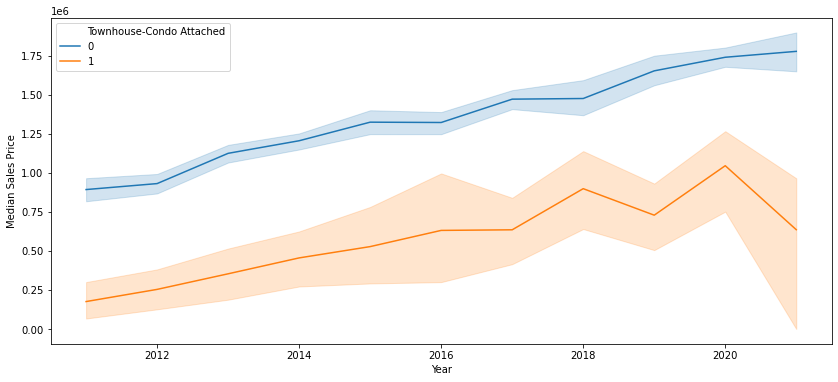

<IPython.core.display.Javascript object>

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))

df_city = df[df["City"] == "Lafayette"]

sns.lineplot(
    x=df_city["Year"],
    y=df_city["Median Sales Price"],
    ax=ax,
    hue=df_city["Townhouse-Condo Attached"],
)

<AxesSubplot:xlabel='Year', ylabel='Days on Market Until Sale'>

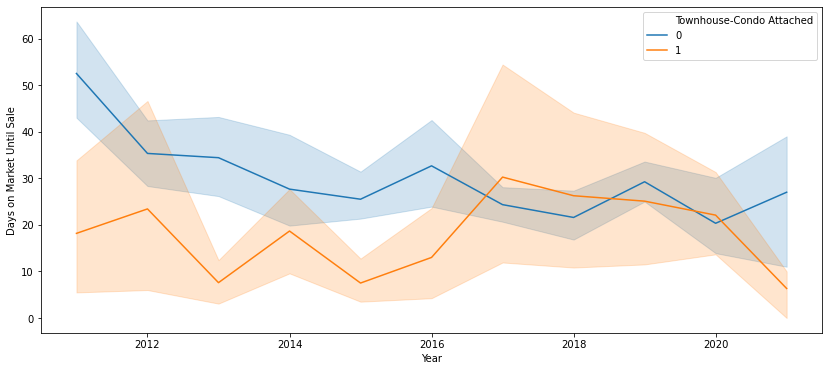

<IPython.core.display.Javascript object>

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(
    x=df_city["Year"],
    y=df_city["Days on Market Until Sale"],
    ax=ax,
    hue=df_city["Townhouse-Condo Attached"],
)

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

<IPython.core.display.Javascript object>

In [10]:
choosen_df = df[
    df["Year"].isin([2021, 2020, 2019, 2018])
    & df["Month num"].isin([1, 2, 3])
    & df["City"].isin(["Concord"])
    & df["Single-Family Detached"]
    == 1
]
choosen_df.head()

,City,Townhouse-Condo Attached,Single-Family Detached,New Listings,Pending Sales,Closed Sales,Days on Market Until Sale,Median Sales Price,Average Sales Price,Percent of Original List Price Received,Inventory of Homes for Sale,Year,Month num,Month
6,Concord,0,1,93.0,NaN,63.0,13,740000,755697,105.29,39,2021,1,January
78,Concord,0,1,85.0,NaN,77.0,19,775000,778033,106.52,53,2021,2,February
150,Concord,0,1,113.0,NaN,103.0,9,801000,856152,109.69,56,2021,3,March
6270,Concord,0,1,72.0,57.0,59.0,27,613000,647490,101.68,54,2018,1,January
6342,Concord,0,1,84.0,NaN,53.0,25,610000,626821,103.23,53,2018,2,February


<IPython.core.display.Javascript object>

In [11]:
colors = [
    "lightcoral",
    "lightsteelblue",
    "lightgoldenrodyellow",
    "lightseagreen",
    "lightsalmon",
    "lightskyblue",
    "lightgreen",
    "lightpink",
    "lightgray",
    "lightblue",
]

<IPython.core.display.Javascript object>

In [20]:
fig = go.Figure()
for m in set(choosen_df["Year"]):
    color = colors[m % 10]
    fig.add_trace(
        go.Bar(
            x=choosen_df["Month"],
            y=choosen_df[choosen_df["Year"] == m]["Average Sales Price"],
            name=m,
            text=m,
            textposition="inside",
            insidetextanchor="start",
            hovertemplate="<br>Price: %{y}",
            marker_color=color,
            showlegend=False,
        )
    )

fig.update_layout(
    barmode="group",
    title={
        "text": "Average Price",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    yaxis_title="Price ($)",
    # yaxis_range=[0, 1000000],
)
fig.update_yaxes(rangemode="tozero")
fig.show()

<IPython.core.display.Javascript object>

In [16]:
fig = go.Figure()
price_diff = [p - 100 for p in choosen_df[
                "Percent of Original List Price Received"
            ]]
for m in set(choosen_df["Year"]):
    color = colors[m % 10]
    fig.add_trace(
        go.Bar(
            x=choosen_df["Month"],
            y=[p - 100 for p in choosen_df[choosen_df["Year"] == m][
                "Percent of Original List Price Received"
            ]],
            name=m,
            text=m,
            texttemplate='%{text}<br>%{y}%', 
            textposition='outside',
            insidetextanchor="start",
            marker_color=color,
            showlegend=False,
            cliponaxis=False,
            hoverinfo='skip',
        )
    )
    
fig.update_layout(
    barmode="group",
    title={
        "text": "Percent of Original List Price",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    yaxis_title="Price (%)",
    yaxis_range=[min(price_diff) - 3, max(price_diff) + 3]
)
fig.show()


<IPython.core.display.Javascript object>

In [ ]:
fig = go.Figure()
for m in set(choosen_df["Year"]):
    color = colors[m % 10]
    fig.add_trace(
        go.Bar(
            x=choosen_df["Month"],
            y=choosen_df[choosen_df["Year"] == m]["New Listings"],
            name=m,
            text=m,
            textposition="inside",
            insidetextanchor="start",
            offsetgroup=m,
            hovertemplate="<br>New Listings: %{y}",
            marker_color=color,
            showlegend=False,
            opacity=0.8,
        )
    )
    fig.add_trace(
        go.Bar(
            x=choosen_df["Month"],
            y=choosen_df[choosen_df["Year"] == m]["Closed Sales"],
            name=m,
            text=m,
            textposition="inside",
            insidetextanchor="start",
            offsetgroup=m,
            hovertemplate="<br>Closed Sales: %{y}",
            marker_color=color,
            showlegend=False,
            opacity=0.8,
        )
    )

fig.update_layout(
    title={
        "text": "New Listings vs Closed Sales",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    yaxis_title="Sales",
)

fig.show()

In [15]:
choosen_df

,City,Townhouse-Condo Attached,Single-Family Detached,New Listings,Pending Sales,Closed Sales,Days on Market Until Sale,Median Sales Price,Average Sales Price,Percent of Original List Price Received,Inventory of Homes for Sale,Year,Month num,Month
6,Concord,0,1,93.0,NaN,63.0,13,740000,755697,105.29,39,2021,1,January
78,Concord,0,1,85.0,NaN,77.0,19,775000,778033,106.52,53,2021,2,February
150,Concord,0,1,113.0,NaN,103.0,9,801000,856152,109.69,56,2021,3,March
6270,Concord,0,1,72.0,57.0,59.0,27,613000,647490,101.68,54,2018,1,January
6342,Concord,0,1,84.0,NaN,53.0,25,610000,626821,103.23,53,2018,2,February
6414,Concord,0,1,104.0,NaN,88.0,14,652500,644491,103.58,78,2018,3,March
7134,Concord,0,1,68.0,NaN,46.0,42,598000,619154,99.51,85,2019,1,January
7206,Concord,0,1,90.0,NaN,60.0,32,617000,611885,100.67,83,2019,2,February
7278,Concord,0,1,112.0,NaN,88.0,28,597500,639619,100.32,112,2019,3,March
7998,Concord,0,1,85.0,NaN,56.0,38,620000,640886,102.44,40,2020,1,January


<IPython.core.display.Javascript object>